In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree # for tree.plot_tree()
from sklearn.tree import export_text # for export_text()
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import (precision_score, recall_score,
                             accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay)
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier



In [2]:
loans_raw = pd.read_csv("https://raw.githubusercontent.com/mrbarron3/stat451/main/loan_data.csv")
loans_p = loans_raw[["purpose", "int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", "delinq.2yrs", "not.fully.paid"]]

loans = loans_p.join(pd.get_dummies(loans_p.purpose))
loans = loans.drop("purpose", axis=1)


print(len(loans_raw))

loans.head()

9578


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,delinq.2yrs,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,0,0,0,0,1,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,0,0,0,1,0,0,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,0,0,0,0,1,0,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,0,0,0,0,1,0,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,1,0,0,1,0,0,0,0,0


In [3]:
loans.describe()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,delinq.2yrs,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,0.163708,0.160054,0.243370,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,0.546215,0.366676,0.429139,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


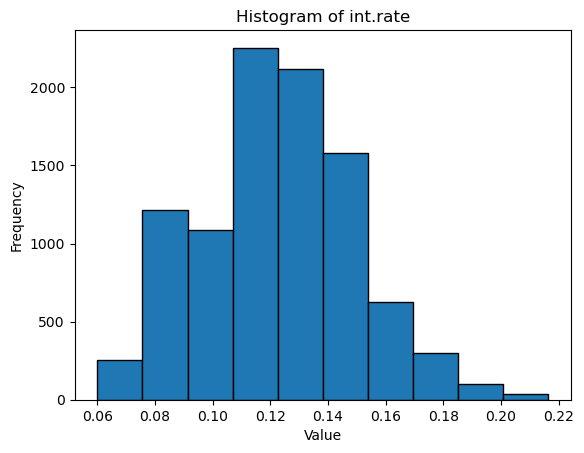

In [4]:
# Plot histogram to show distribution of interest rate 
plt.hist(loans['int.rate'], edgecolor='black')

plt.title('Histogram of ' + 'int.rate')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


#could also do this to show paying back loan in relation to interest rate?

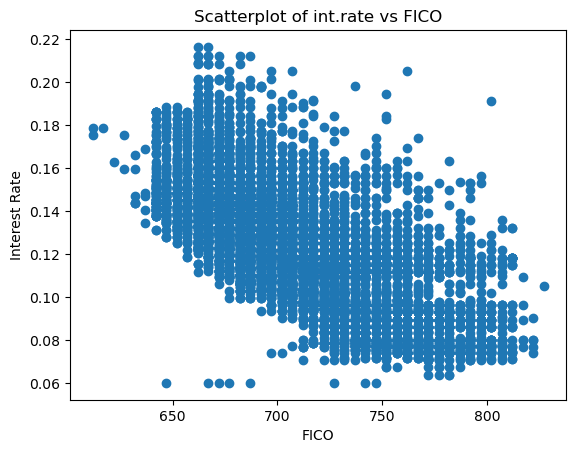

In [5]:
# Plot scatterplot that shows FICO vs. interest rate 
plt.scatter(loans["fico"], loans["int.rate"])

plt.title('Scatterplot of ' + 'int.rate vs FICO')
plt.xlabel('FICO')
plt.ylabel('Interest Rate')

plt.show()

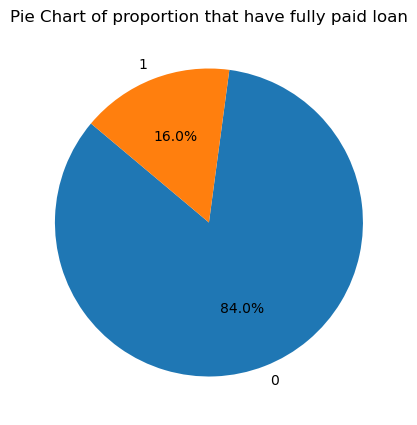

In [6]:
# Create a pie chart of how many people have paid 
category_counts = loans['not.fully.paid'].value_counts()

# Creating the pie chart
plt.figure(figsize=(5, 5))  # Optional: Specifies the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Pie Chart of proportion that have fully paid loan')
plt.show()

C:\Users\Patron\AppData\Local\Temp\ipykernel_4240\2583285556.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, index+1)


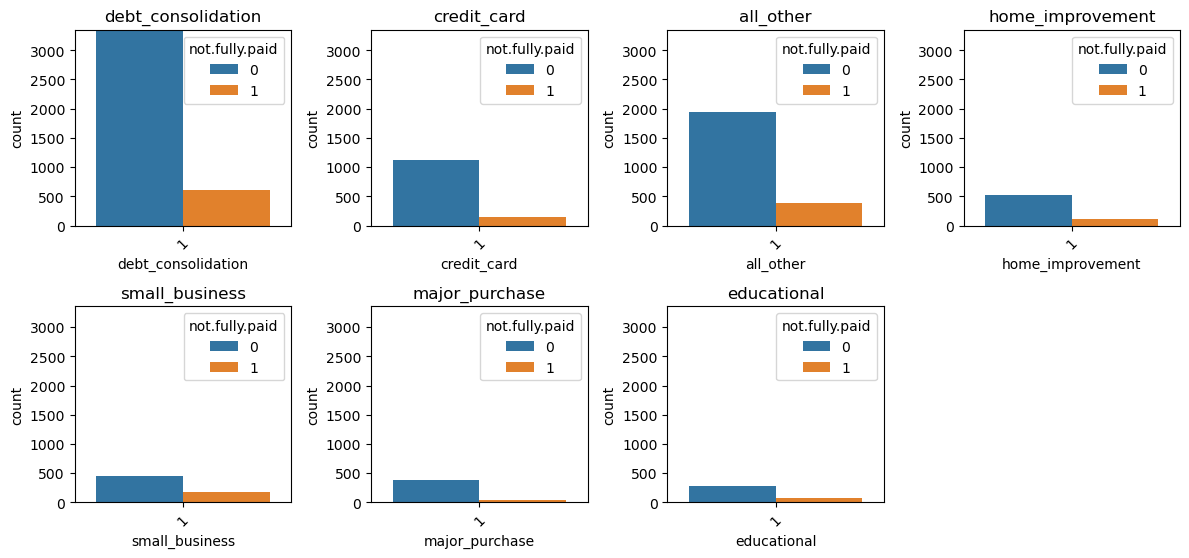

In [7]:
# Adjusting the code to set the same y-axis scale for all subplots

# Extracting the loan purposes
loan_purposes = []
for purpose in loans_p["purpose"]:
    if purpose not in loan_purposes:
        loan_purposes.append(purpose)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Creating a grid of countplots
max_y = 0  
for purpose in loan_purposes:
    df = loans[loans[purpose] == 1]
    current_plot = sns.countplot(x=df[purpose], hue=loans['not.fully.paid'], data=loans)
    max_y = max(max_y, max([p.get_height() for p in current_plot.patches]))  

for index, purpose in enumerate(loan_purposes):
    plt.subplot(3, 4, index+1)  
    sns.countplot(x=loans[loans[purpose] == 1][purpose], hue=loans['not.fully.paid'])
    plt.ylim(0, max_y)  
    plt.title(purpose)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
#more exploratory plots add

In [31]:
X = loans.drop(columns=['not.fully.paid'])
y = loans['not.fully.paid']

#commented part is feature selection. this can reduce overfitting. we are not overfitting though so don't think this is necessary

#doing this changed the decision tree classifiers so that 1-4 are all the same
#from sklearn.feature_selection import VarianceThreshold
#sel = VarianceThreshold(threshold=(.84 * (1 - .84)))
#newX = sel.fit_transform(X)

#doing this changed the decision tree classifiers so that 1-4 are all the same
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif
#print(X.shape)
#ow do we choose a good k value? evaluate scores changing?
#using 14 makes its so decision tree classifiers with max depth 1-4 all have heighest accuracy score?
#X_new = SelectKBest(f_classif, k=7).fit_transform(X, y)
#print(X_new.shape)

#tried oversample
#from imblearn.over_sampling import RandomOverSampler
#rs = RandomOverSampler(random_state=None)
#X_resampled, y_resampled = rs.fit_resample(X, y)


header = list(X.columns)

#scaler = MinMaxScaler()
#X_new = scaler.fit_transform(X) # do scaling


X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=.2,
                                                  random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0, stratify=y_tmp)


1.0
0.7536534446764092
The Training Data Set Accuracy: 1.0 is greater than the Validation Mean Accuracy: 0.7394942253878554
We are overfitting our data.


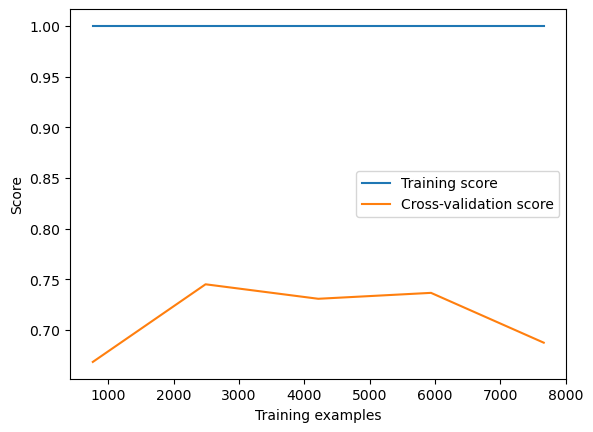

In [10]:
#first do basic model 
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
y_pred2 = tree_clf.predict(X_valid)


accscore = accuracy_score(y_train,y_pred)
accscore2 = accuracy_score(y_valid,y_pred2)
print(accscore)
print(accscore2)

#should this be with training or validation data?
crossvalscore = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()

#then check for overfitting 
print(f'The Training Data Set Accuracy: {accscore} is greater than the Validation Mean Accuracy: {crossvalscore}')
print('We are overfitting our data.')

#plot to show overfitting?
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(tree_clf, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [11]:
#interpretation: you can guess that someone will pay back their loan by guessing 0 and you will be accurate 84% of the time

zeroY = y[y == 0]
percent_zeros2 = len(zeroY) / 9578
print(f'Percentage of 0s for y variable. Whether someone will not pay back their loan {percent_zeros2}')

   
#9577    

Percentage of 0s for y variable. Whether someone will not pay back their loan 0.8399457089162664


In [40]:
#how much does the score differ for different classifiers and parameterS?
#tried class_weight = 'balanced', made things much worse

model = linear_model.LogisticRegression(max_iter=5000, C = 0.01)
model2 = linear_model.LogisticRegression(max_iter=5000, C = 1)
model3 = linear_model.LogisticRegression(max_iter=5000, C = 1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
new_thresh = (model.predict_proba(X_valid)[:, 1] >= 0.2).astype(int)
print(accuracy_score(y_valid, new_thresh))
probability_y_is_1 = model.predict(X_valid)
print(confusion_matrix(y_true = y_test, y_pred = new_thresh)) 
print(f'Log regression with C = .01:{model.score(X_valid, y_valid)}')


model2.fit(X_train, y_train)   
y_pred = model2.predict(X_valid)
new_thresh2 = (model2.predict_proba(X_valid)[:, 1] >= 0.2).astype(int)
print("\n", accuracy_score(y_valid, new_thresh))
probability_y_is_1 = model2.predict(X_valid)
print(confusion_matrix(y_true = y_test, y_pred = new_thresh2))
print(precision_score(y_valid, new_thresh))
print(f'Log regression with C = 1: {model2.score(X_valid, y_valid)}')


model3.fit(X_train, y_train)
y_pred = model3.predict(X_valid)
new_thresh3 = (model3.predict_proba(X_valid)[:, 1] >= 0.2).astype(int)
print("\n",accuracy_score(y_valid, new_thresh))
probability_y_is_1 = model3.predict(X_valid)
print(confusion_matrix(y_true = y_test,y_pred =  new_thresh3))
print(f'Log regression with C = 1000: {model3.score(X_valid, y_valid)}')

0.7964509394572025
[[726  79]
 [141  12]]
Log regression with C = .01:0.8392484342379958

 0.7964509394572025
[[649 156]
 [129  24]]
0.27472527472527475
Log regression with C = 1: 0.8392484342379958

 0.7964509394572025
[[649 156]
 [129  24]]
Log regression with C = 1000: 0.8392484342379958


In [13]:
#must normalize data
scaler = MinMaxScaler()
X_scaled1 = scaler.fit_transform(X_train) # do scaling
X_scaled2 = scaler.fit_transform(X_valid) # do scaling

model4 = KNeighborsClassifier(n_neighbors = 1)
model5 = KNeighborsClassifier(n_neighbors =2 )
model6 = KNeighborsClassifier(n_neighbors = 3)
model7 = KNeighborsClassifier(n_neighbors = 4)

model4.fit(X_scaled1, y_train)
print(f'KNN Classifier with n_neighbors = 1: {model4.score(X_scaled2, y_valid)}')

model5.fit(X_scaled1, y_train)
print(f'KNN Classifier with n_neighbors = 2: {model5.score(X_scaled2, y_valid)}')

model6.fit(X_scaled1, y_train)
print(f'KNN Classifier with n_neighbors = 3: {model6.score(X_scaled2, y_valid)}')

model7.fit(X_scaled1, y_train)
print(f'KNN Classifier with n_neighbors = 4: {model7.score(X_scaled2, y_valid)}')

KNN Classifier with n_neighbors = 1: 0.744258872651357
KNN Classifier with n_neighbors = 2: 0.8204592901878914
KNN Classifier with n_neighbors = 3: 0.7943632567849687
KNN Classifier with n_neighbors = 4: 0.8277661795407099


In [45]:
#tried class_weight = 'balanced', made things much worse
tree1 = DecisionTreeClassifier(criterion= 'entropy', max_depth = 1)
tree2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2)
tree3 = DecisionTreeClassifier(criterion= 'entropy', max_depth = 3)
tree4 = DecisionTreeClassifier(criterion= 'entropy', max_depth = 4)
#tree5 = DecisionTreeClassifier(criterion= 'entropy', max_depth = 9)

tree1.fit(X_train, y_train)
print(f'Tree Classifier with n_neighbors = 1: {tree1.score(X_valid, y_valid)}')

tree2.fit(X_train, y_train)
print(f'Tree Classifier with n_neighbors = 3: {tree2.score(X_valid, y_valid)}')

tree3.fit(X_train, y_train)
print(f'Tree Classifier with n_neighbors = 4: {tree3.score(X_valid, y_valid)}')

tree4.fit(X_train, y_train)
print(f'Tree Classifier with n_neighbors = 7: {tree4.score(X_valid, y_valid)}')

#tree5.fit(X_train, y_train)
#print(f'Tree Classifier with n_neighbors = 7: {tree5.score(X_valid, y_valid)}')

Tree Classifier with n_neighbors = 1: 0.8392484342379958
Tree Classifier with n_neighbors = 3: 0.8392484342379958
Tree Classifier with n_neighbors = 4: 0.8382045929018789
Tree Classifier with n_neighbors = 7: 0.837160751565762


precision=0.0, recall=0.0, accuracy=0.8402922755741128
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       805
           1       0.00      0.00      0.00       153

    accuracy                           0.84       958
   macro avg       0.42      0.50      0.46       958
weighted avg       0.71      0.84      0.77       958

[[805   0]
 [153   0]]
TN=805, FP=0, FN=153, TP=0
0.0
0.0


C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\metrics\_classificati

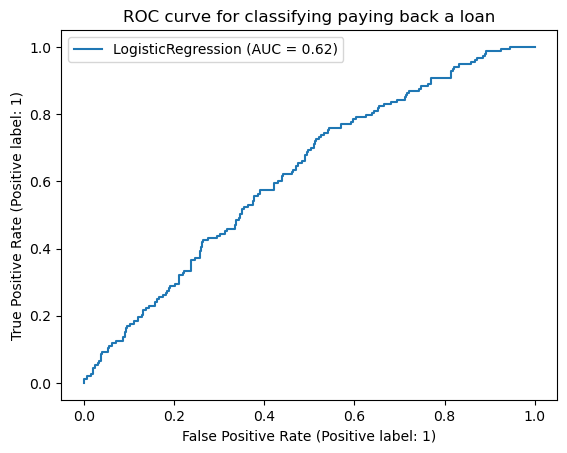

In [44]:
#Accuracy can be used when the class distribution is similar while F1-score is a better metric 
#when there are imbalanced classes as in the above case. 

#evaluating log regression model
finallog = linear_model.LogisticRegression(max_iter=5000, C = 1000)
finallog.fit(X_train, y_train)

preds1=finallog.predict(X_test)

precision = precision_score(y_test, y_pred=preds1)
recall = recall_score( y_test, y_pred=preds1)
accuracy = accuracy_score(y_test, y_pred=preds1)
print(f'precision={precision}, recall={recall}, accuracy={accuracy}')

print(classification_report(y_test,preds1))
M1= confusion_matrix(y_test,preds1)
print(M1)
TN, FP, FN, TP = M1.ravel() # .ravel() returns a vector from a matrix
print(f'TN={TN}, FP={FP}, FN={FN}, TP={TP}')

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
print(TPR)
print(FPR)

RocCurveDisplay.from_estimator(finallog, X_test, y_test)
#change this to being TPR = FPR but rn both are 0...
#plt.plot([0, 1], [0, 1], ':k', label='merely guessing') # add diagonal line
plt.title('ROC curve for classifying paying back a loan')
plt.legend()

#should we have a higher precision for 1's? prof gave an example about credit card fraud. we would rather have them disable a card abroad then not catch a fradualent activity. 
#we would rather have than not approve the loan of someone than approve the loan of someone that won't pay back?

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       805
           1       0.00      0.00      0.00       153

    accuracy                           0.84       958
   macro avg       0.42      0.50      0.46       958
weighted avg       0.71      0.84      0.77       958

[[805   0]
 [153   0]]
TN=805, FP=0, FN=153, TP=0


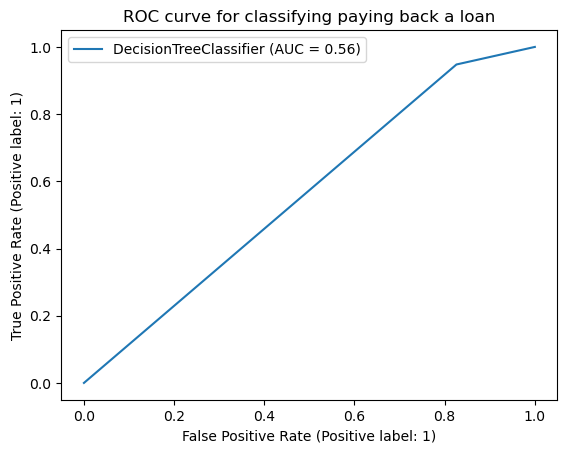

In [47]:
preds2=tree1.predict(X_test)

print(classification_report(y_test,preds2))
M2 = confusion_matrix(y_test,preds2)
print(M2)
TN, FP, FN, TP = M2.ravel() # .ravel() returns a vector from a matrix
print(f'TN={TN}, FP={FP}, FN={FN}, TP={TP}')

#TPR = TP/(TP + FN)
#FPR = FP/(FP + TN)
#print(TPR)
#print(FPR)

RocCurveDisplay.from_estimator(tree1, X_test, y_test)
#plt.plot([0, 1], [0, 1], ':k', label='merely guessing') # add diagonal line
plt.title('ROC curve for classifying paying back a loan')
plt.legend()
None

validation score: 0.8413361169102297
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       805
           1       0.00      0.00      0.00       153

    accuracy                           0.84       958
   macro avg       0.42      0.50      0.46       958
weighted avg       0.71      0.84      0.77       958

[[804   1]
 [153   0]]
TN=804, FP=1, FN=153, TP=0


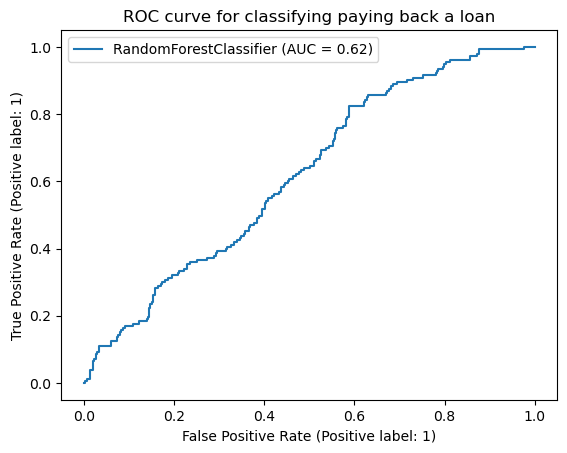

In [48]:
forest = RandomForestClassifier(max_depth = 11, random_state = 0)
forest.fit(X_train, y_train)
print(f'validation score: {forest.score(X_valid, y_valid)}')

preds2=forest.predict(X_test)

print(classification_report(y_test,preds2))
M2 = confusion_matrix(y_test,preds2)
print(M2)
TN, FP, FN, TP = M2.ravel() # .ravel() returns a vector from a matrix
print(f'TN={TN}, FP={FP}, FN={FN}, TP={TP}')

#TPR = TP/(TP + FN)
#FPR = FP/(FP + TN)
#print(TPR)
#print(FPR)

RocCurveDisplay.from_estimator(forest, X_test, y_test)
#plt.plot([0, 1], [0, 1], ':k', label='merely guessing') # add diagonal line
plt.title('ROC curve for classifying paying back a loan')
plt.legend()
None


In [18]:
classifiers = [
    linear_model.LogisticRegression(max_iter=5000), 
    DecisionTreeClassifier(), 
    KNeighborsClassifier(),
    RandomForestClassifier()
]
parameters = [ 
    {'C': [0.01, 1, 100]},
    {'criterion': ['entropy'], 'max_depth': [1, 3, 5, 7]},
    {'n_neighbors': [1, 2, 3, 4]},
    {'max_depth':[1,3,5,7,11,12,15,18]}
]

best_idx = -1
best_accuracy = -np.Inf
best_clf = None
best_precision = []

for i in range(len(classifiers)):
    if isinstance(classifiers[i], svm.SVC):
        clf = RandomizedSearchCV(classifiers[i], parameters[i])
    else:
        clf = GridSearchCV(classifiers[i], parameters[i])
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_valid, y_valid)
    y_pred = clf.predict(X_valid)
    precision = precision_score(y_valid, y_pred)
    best_precision.append(precision)
    print(accuracy)
    if np.any(accuracy > best_accuracy):
        best_idx = i
        best_accuracy = accuracy 
        best_clf = clf
        best_params = clf.best_params_
    elif np.all(accuracy == best_accuracy):
        if type(best_clf) != list:
            best_idx = [best_idx, i]
            best_accuracy = [best_accuracy, accuracy] 
            best_clf = [best_clf, clf]
            best_params = [best_params, clf.best_params_]
        
#print(f'The best classifiers are {[classifiers[best_idx[0]], classifiers[best_idx[1]], ]} with the parameters {best_params}')
print(best_clf)
print(best_precision)

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8392484342379958


C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8392484342379958
0.826722338204593
0.8392484342379958
[GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 1, 100]}), GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [1, 3, 5, 7]})]
[0.0, 0.0, 0.16666666666666666, 0.0]


C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
#Regularization addresses overfitting by inducing a simpler model
#chronoligically when should we do this? 
#if even after our hyper paramter tuning there is overfitting? 
#lasso helps us see feature importance. should we even do ridge? 


model = linear_model.LogisticRegression(penalty='l1', C = 1000, solver = 'liblinear', random_state = 0)

model.fit(X_train, y_train)


w = model.coef_[0] 
intercept = model.intercept_

print(f"Score of train: {model.score(X_train, y_train)}, Score of test: {model.score(X_test, y_test)}")

print(f"The coefficients are {w}")
print(f"These coefficients match up with these header names: {header}")

non_zero_vars = []
for i in range(len(w)):
    if np.isclose(w[i], 0, atol=1e-2):
        continue
    non_zero_vars.append(header[i])
    
print(f' The non zero coefficients after Lasso are {non_zero_vars}')



Score of train: 0.8395980161837641, Score of test: 0.8413361169102297
The coefficients are [ 1.67305047e+00  1.04288933e-03 -4.02218206e-01  1.17325280e-03
 -1.27084326e-02  1.42177046e-05  4.32343942e-06 -1.07034083e-01
  6.73611931e+00  6.15148640e+00  6.42305100e+00  6.77406443e+00
  6.93546431e+00  6.51094930e+00  7.25199830e+00]
These coefficients match up with these header names: ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'delinq.2yrs', 'all_other', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'major_purchase', 'small_business']
 The non zero coefficients after Lasso are ['int.rate', 'log.annual.inc', 'fico', 'delinq.2yrs', 'all_other', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'major_purchase', 'small_business']


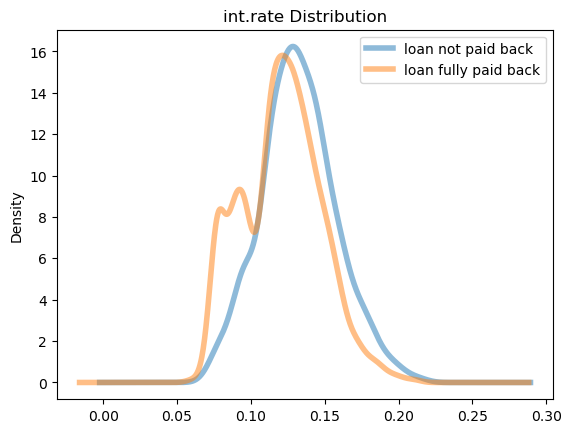

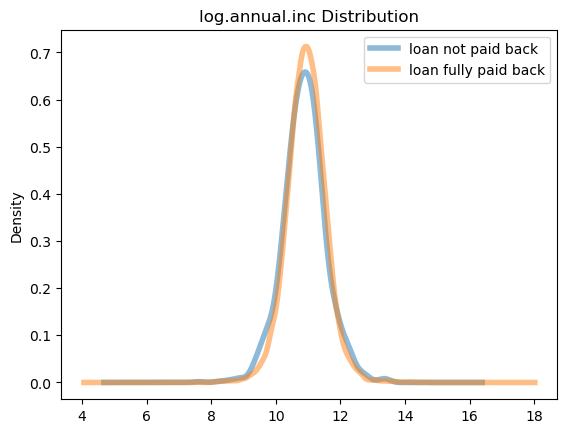

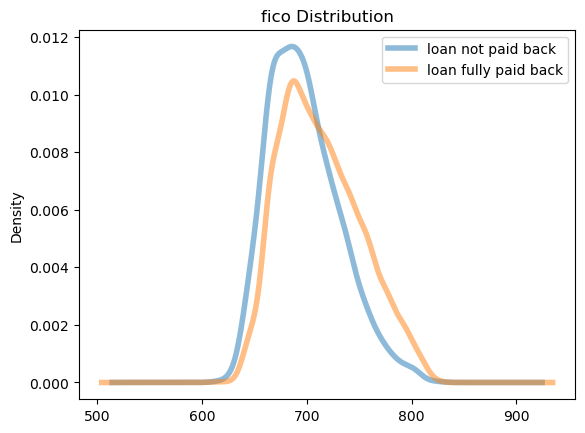

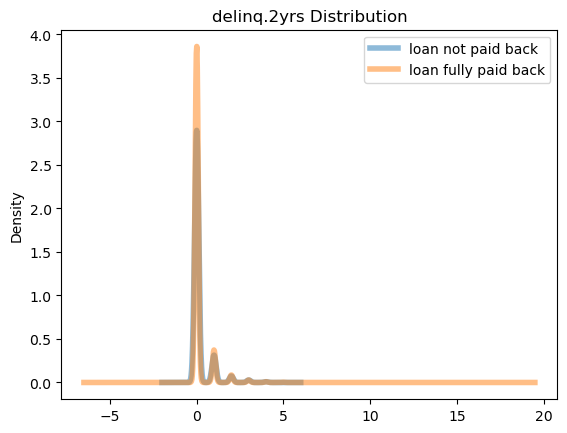

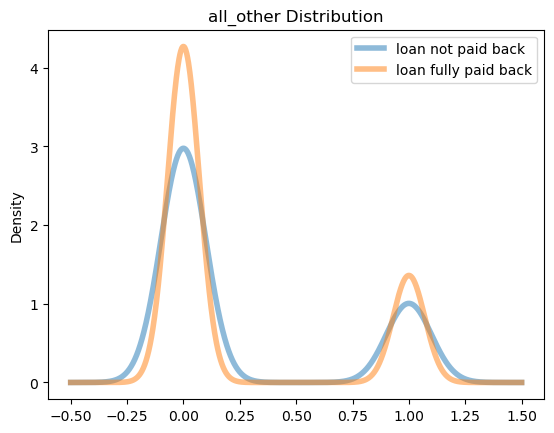

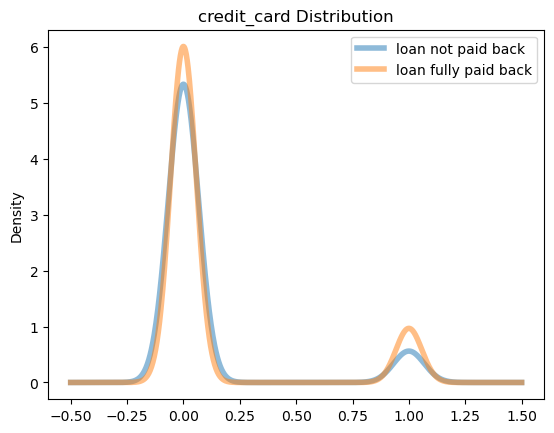

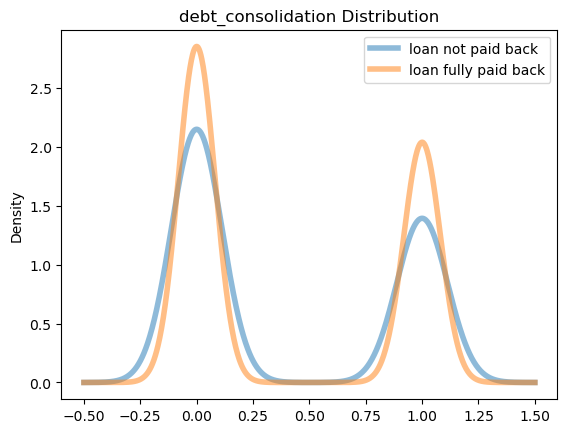

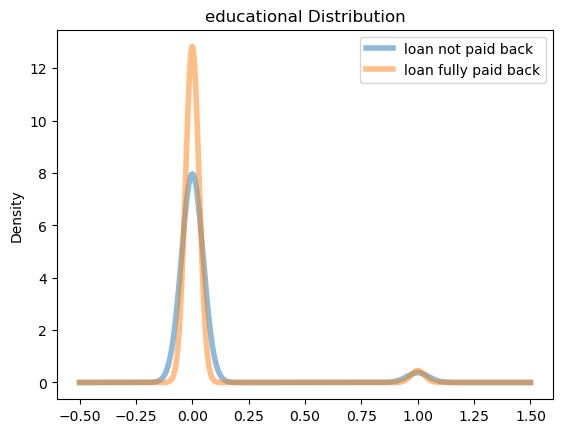

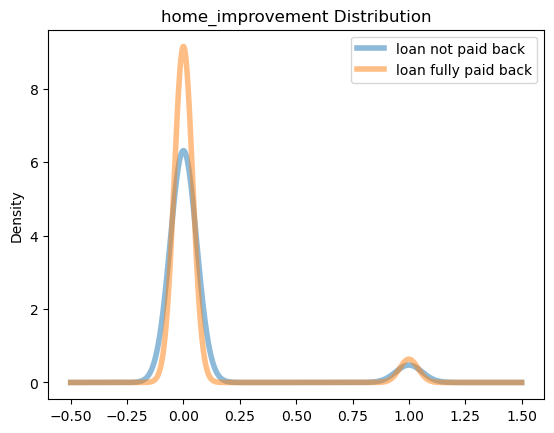

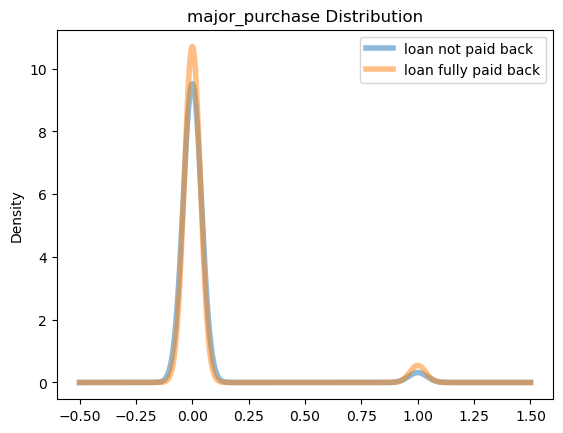

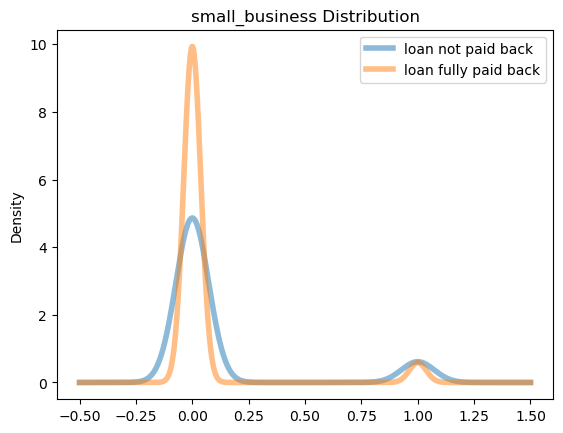

In [50]:
for var in non_zero_vars:
    loans[loans["not.fully.paid"] == 1][var].plot(kind = 'density', alpha = 0.5, label = 'loan not paid back', linewidth=4)
    loans[loans["not.fully.paid"] == 0][var].plot(kind = 'density', alpha = 0.5, label = 'loan fully paid back', linewidth=4)
    
    plt.title(f"{var} Distribution")
    plt.legend()
    plt.show(block=False)

In [ ]:
#logistic curve for the features that were important 
#interest rate graph

In [22]:
model2 = linear_model.LogisticRegression(penalty='l2')

model2.fit(X_train, y_train)
w2 = model2.coef_[1:] 
intercept = model2.intercept_


In [ ]:
#plot the training data, test data, lasso,ridge, and log regression through a graph like in https://pages.stat.wisc.edu/~jgillett/451/burkov/05/05modelFitRegularize.html


Feature: 0, Score: -0.00000
Feature: 1, Score: 0.00074
Feature: 2, Score: -0.00003
Feature: 3, Score: -0.00002
Feature: 4, Score: -0.00256
Feature: 5, Score: -0.00004
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: 0.00000


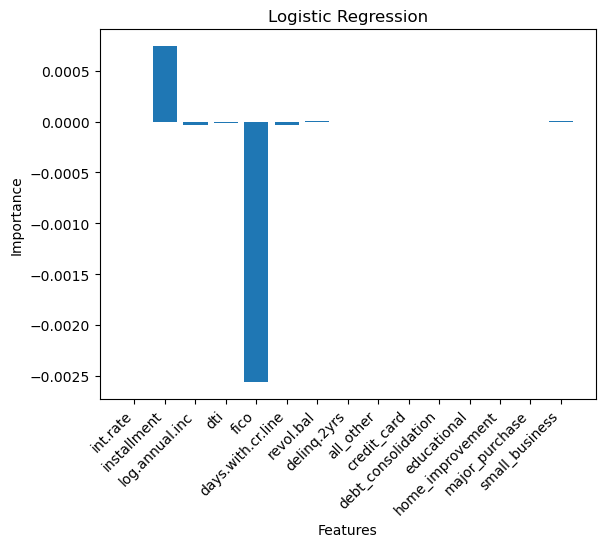

In [23]:
modelPerm = linear_model.LogisticRegression(C=1000)
modelPerm.fit(X, y)

# get importance
importance = modelPerm.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
ind = [x for x in range(len(importance))]
plt.bar(ind, importance, tick_label=X.columns)
plt.title('Logistic Regression')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

pi.importances_mean=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.35247442e-05 -1.25287116e-04  1.87930674e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
pi.importances_std=[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.17623721e-05 7.81302440e-05 1.02296502e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
pi.importances=[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.00010441  0.         -0.00010441 -0.00010441 -0.00010441]
 [-0.00020881 -0.00020881 -0.00010441 -0.00010441  0.        ]
 [ 0.          0.00020881  0.00020881  0.00020881  0.00031322]
 [ 0.          0.          0. 

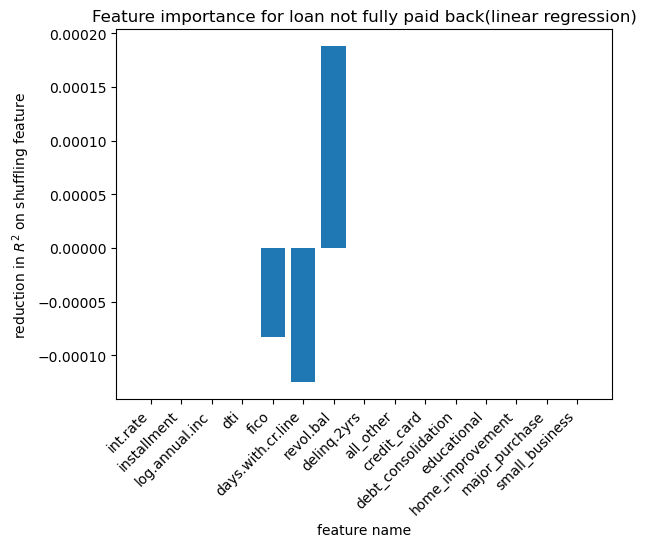

In [24]:
modelPerm = linear_model.LogisticRegression(C=1000)
modelPerm.fit(X, y)

pi = permutation_importance(estimator=modelPerm, X=X, y=y)
print(f'pi.importances_mean={pi.importances_mean}')
print(f'pi.importances_std={pi.importances_std}')
print(f'pi.importances={pi.importances}')
plt.bar(x=range(X.columns.size), height=pi.importances_mean, tick_label=X.columns)
plt.xticks(rotation=45, ha='right')
plt.title('Feature importance for loan not fully paid back(linear regression)')
plt.xlabel('feature name')
_ = plt.ylabel(r'reduction in $R^2$ on shuffling feature')

In [25]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

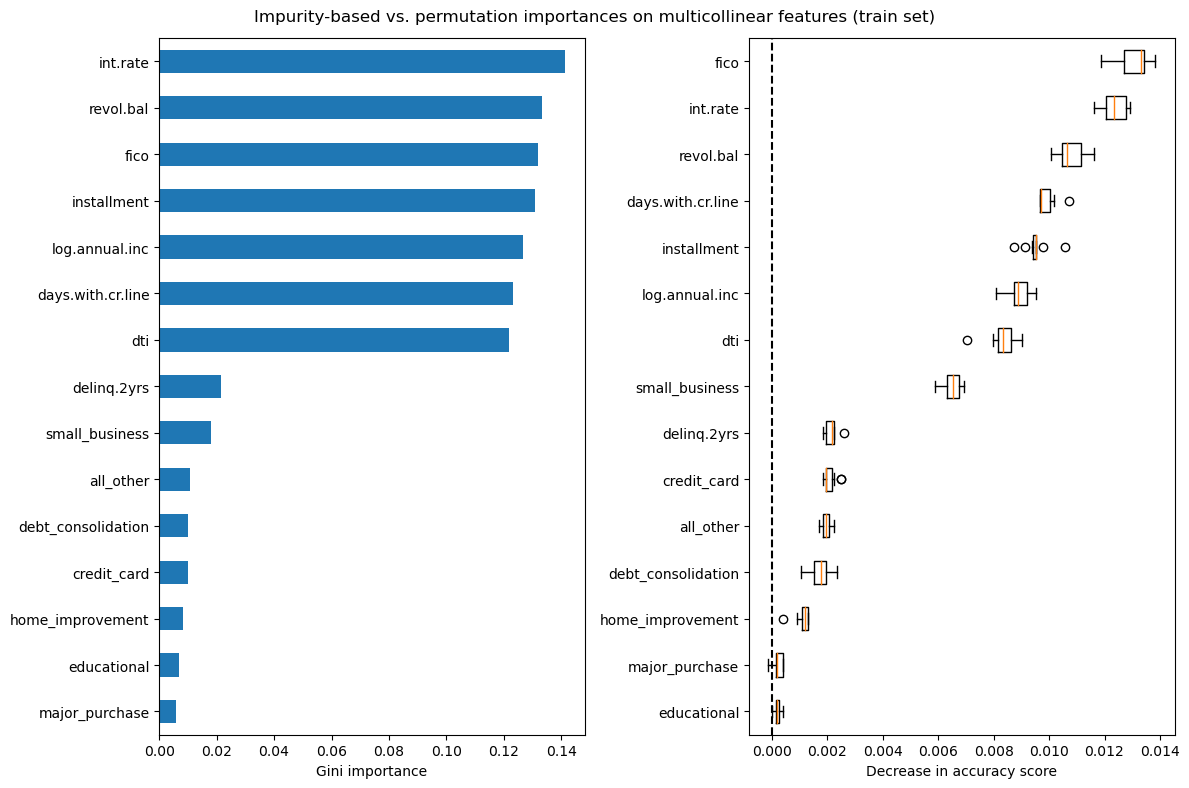

In [32]:
#tree_clf = DecisionTreeClassifier(max_depth=4)
#tree_clf.fit(X_train,y_train)

#importance for log regression is determined by coef values. so lasso should cover this?

tree_clf = RandomForestClassifier(max_depth = 11)
tree_clf.fit(X_train,y_train)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(tree_clf.feature_importances_, index = X_train.columns)
tree_importance_sorted_idx = np.argsort(tree_clf.feature_importances_)
tree_indices = np.arange(0, len(tree_clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(tree_clf, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

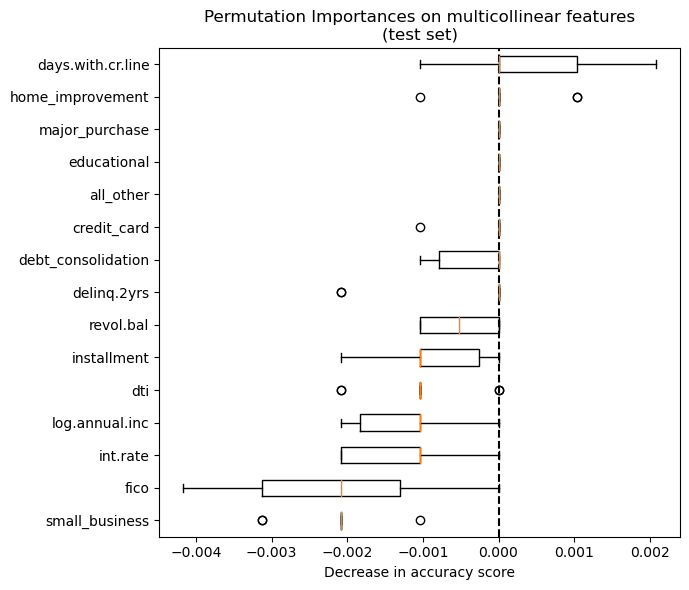

In [33]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(tree_clf, X_test, y_test, ax)
ax.set_title("Permutation Importances on multicollinear features\n(test set)")
ax.set_xlabel("Decrease in accuracy score")
_ = ax.figure.tight_layout()

In [34]:
#compute a meaningful permutation importance in the presence of correlated features

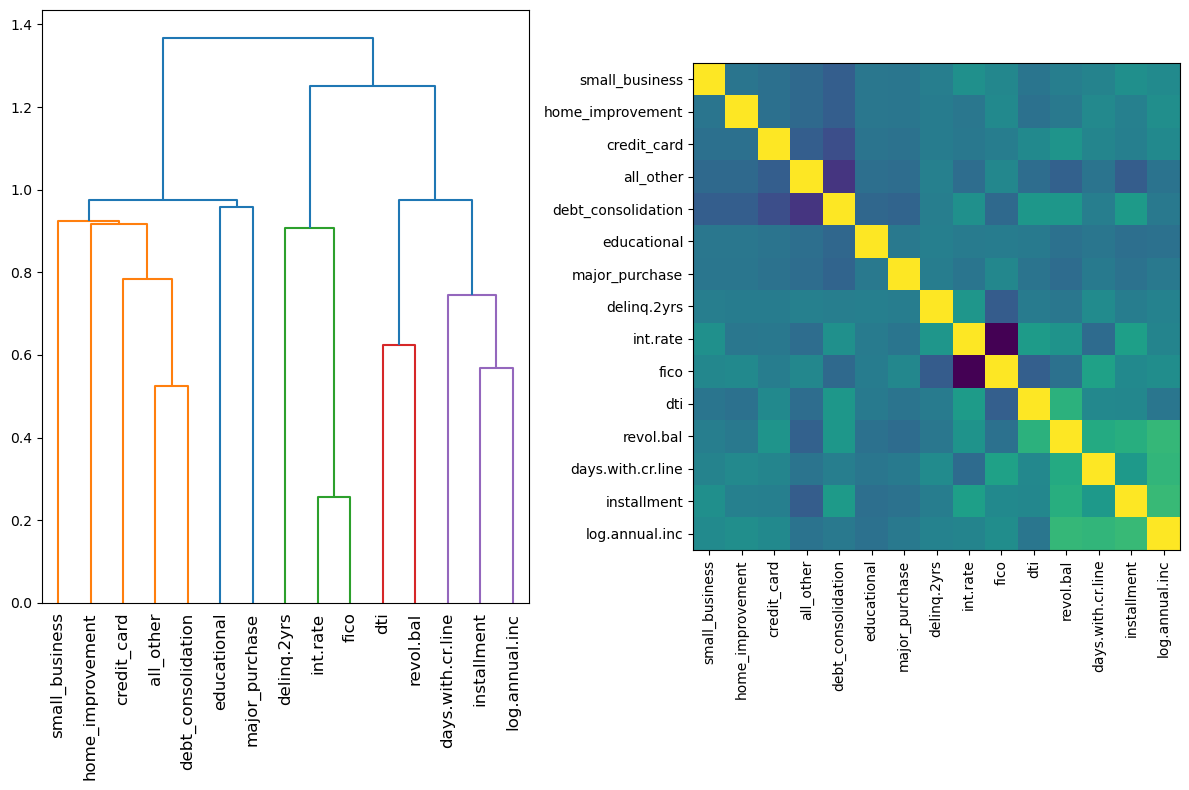

In [35]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns.to_list(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
_ = fig.tight_layout()

In [36]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features_names = X.columns[selected_features]

X_train_sel = X_train[selected_features_names]
X_test_sel = X_test[selected_features_names]


clf_sel = RandomForestClassifier(max_depth = 11)
#DecisionTreeClassifier(max_depth=4)
clf_sel.fit(X_train_sel, y_train)
print(
    "Baseline accuracy on test data with features removed:"
   f" {clf_sel.score(X_test_sel, y_test)}"
)

Baseline accuracy on test data with features removed: 0.8392484342379958


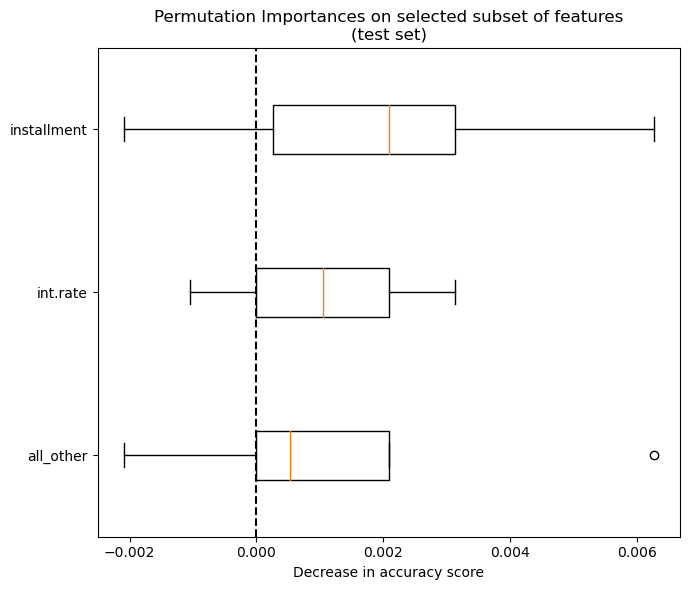

In [37]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(clf_sel, X_test_sel, y_test, ax)
ax.set_title("Permutation Importances on selected subset of features\n(test set)")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
plt.show()

In [ ]:
#plt.rcParams["figure.figsize"] = (8, 7) # (width, height) https://matplotlib.org/stable/api/figure_api.html
#tree.plot_tree(modelTree, feature_names=header, filled=True)
#print(export_text(modelTree, feature_names=header))
#print(f'Accuracy on training data is clf.score(X, y)={modelTree.score(X, y)}.')